In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

# 1 layer

## 7-qubit code

(20, 1)


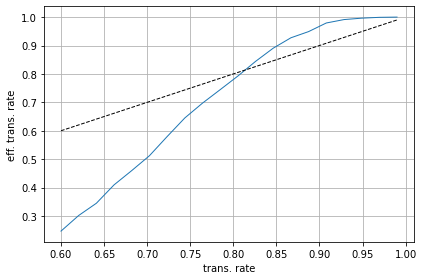

[1.         0.99916684 0.99625352 0.99126914 0.97927517 0.94900069
 0.92720851 0.89066406 0.84410156 0.79247088 0.74462517 0.697225
 0.64500977 0.57950156 0.51211914 0.45985352 0.4096     0.3449115
 0.30181289 0.24688477]


In [4]:
repeat = 24
fileloc = "data_7q_Nl1_1/"
k_log = 1
plt.figure(1,figsize=(6,4))
Nl_list = np.arange(1,2,1)
bdy = True
Nl = 1
first = True
for i_rep in range(repeat):
    if bdy:
        fname = fileloc + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = fileloc + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_X_2 = np.zeros((len(p_list),k_log))
            succ_prob_Z_2 = np.zeros((len(p_list),k_log))
            Ntot = 0

        succ_prob_X_2 += succ_prob_X*Nrep
        succ_prob_Z_2 += succ_prob_Z*Nrep
        Ntot += Nrep

succ_prob_X_2 /= Ntot
succ_prob_Z_2 /= Ntot
succ_prob_2 = np.mean(succ_prob_X_2*succ_prob_Z_2,axis=1)

succ_prob_avg_datalist = []

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = fileloc + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = fileloc + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),k_log))
                print(succ_prob_X_avg.shape)
                succ_prob_Z_avg = np.zeros((len(p_list),k_log))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))
    succ_prob_avg_datalist.append(succ_prob_avg)
x_list = np.linspace(0.6,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
plt.xlabel("trans. rate")
plt.ylabel("eff. trans. rate")
plt.tight_layout()
plt.grid()
plt.show()
p_1l_7q = succ_prob_avg[:,0]
print(p_1l_7q)

## 48-qubit ldpc

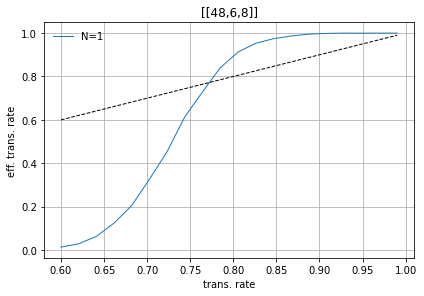

[1.         0.99989583 0.99986111 0.99972224 0.9981952  0.99462528
 0.98553802 0.97268889 0.9483581  0.9063304  0.82696285 0.71578457
 0.59989582 0.4503144  0.31154824 0.19667558 0.11609497 0.06007547
 0.02628789 0.01257807]


In [5]:
repeat = 24
Nl_list =np.arange(1,2,1)
plt.figure(1,figsize=(6,4))

bdy = True
k_logical = 6
Nl = 1
first = True
filelloc = "data_48q_Nl1/"
for i_rep in range(repeat):
    if bdy:
        fname = filelloc + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = filelloc + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_X_2 = np.zeros((len(p_list),k_logical))
            succ_prob_Z_2 = np.zeros((len(p_list),k_logical))
            Ntot = 0

        succ_prob_X_2 += succ_prob_X*Nrep
        succ_prob_Z_2 += succ_prob_Z*Nrep
        Ntot += Nrep

succ_prob_X_2 /= Ntot
succ_prob_Z_2 /= Ntot
succ_prob_2 = np.mean(succ_prob_X_2*succ_prob_Z_2,axis=1)

succ_prob_avg_datalist = []

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = filelloc + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = filelloc + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),k_logical))
                succ_prob_Z_avg = np.zeros((len(p_list),k_logical))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg        
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))
    succ_prob_avg_datalist.append(succ_prob_avg)
x_list = np.linspace(0.6,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
plt.xlabel("trans. rate")
plt.ylabel("eff. trans. rate")
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
plt.grid()
plt.show()

succ_prob_avg_avg_list = []
for k in range(len(succ_prob_avg_datalist)):
    succ_prob_avg_avg_list.append(sum(succ_prob_avg_datalist[k].T[:])/k_logical)
    
succ_prob_X_tot_avg = []
succ_prob_Z_tot_avg = []
for i in range(succ_prob_X_avg.shape[0]):
    succ_prob_X_tot_avg.append(sum(succ_prob_X_avg[i])/succ_prob_X_avg.shape[1])
    succ_prob_Z_tot_avg.append(sum(succ_prob_Z_avg[i])/succ_prob_Z_avg.shape[1])

p_1l_48q = np.array(succ_prob_X_tot_avg) * np.array(succ_prob_Z_tot_avg)

print(p_1l_48q)

## Toric code

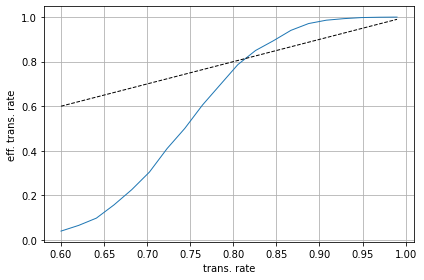

[1.         0.9993751  0.99791775 0.99313682 0.98609038 0.97104601
 0.94049588 0.89341879 0.85004558 0.78673204 0.69618164 0.60531642
 0.50040887 0.4100001  0.30433611 0.22532822 0.15726182 0.09759116
 0.065025   0.03937744]


In [6]:
repeat = 24
Nl_list =np.arange(1,2,1)
Nl = 1
plt.figure(1,figsize=(6,4))
#k_logical = 6
k_logical = 2
L= 6
bdy = True
first = True
fileloc = "data_toric_code_Nl1"
for i_rep in range(repeat):
    if bdy:
        fname = fileloc+"/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = fileloc+"/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
        if first :
            first = False
            succ_prob_X_2 = np.zeros(len(p_list))
            succ_prob_Z_2 = np.zeros(len(p_list))
            Ntot = 0

        succ_prob_X_2 += succ_prob*Nrep
        succ_prob_Z_2 += succ_prob*Nrep
        Ntot += Nrep

succ_prob_X_2 /= Ntot
succ_prob_Z_2 /= Ntot
succ_prob_2 = np.mean(succ_prob_X_2*succ_prob_Z_2,axis=0)

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = fileloc+"/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = fileloc+"/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                #succ_prob_word_X_avg = np.zeros(len(p_list))
                #succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob*Nrep
            succ_prob_Z_avg += succ_prob*Nrep
            #succ_prob_word_X_avg += succ_prob_word_X*Nrep
            #succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
x_list = np.linspace(0.6,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
plt.xlabel("trans. rate")
plt.ylabel("eff. trans. rate")
plt.tight_layout()
plt.grid()
plt.show()

print(succ_prob_avg)
p_1l_toric66 = succ_prob_avg

## Plot: (Fig2)

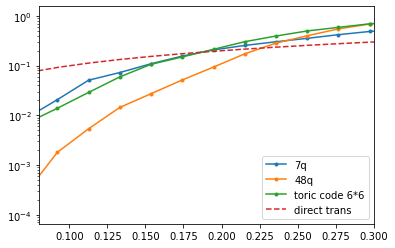

In [8]:
plt.plot(p_list, 1-p_1l_7q, '.-',label='7q')
plt.plot(p_list, 1-p_1l_48q, '.-',label='48q')
plt.plot(p_list, 1-p_1l_toric66, '.-',label='toric code 6*6')
plt.plot(p_list,p_list,'--',label='direct trans')
plt.yscale("log")
plt.xlim([0.08, 0.3])
plt.savefig("Fig2_v1.pdf")
#plt.ylim([0.1,1])
plt.legend()
plt.show()